# Battery Modelling Exercise p2D - Comparison of different physical-chemical models (solution)
In this notebook, we would like to investigate the differences in the various approaches for physical-chemical battery cell models. For the introduction, we used the standard Doyle-Fuller-Newman model which is also known as p2D model. Now, we want to compare the following models:

1. Doyle-Fuller-Newmann Model (DFN)
2. Single Particle Model with Electrolyte (SPMe)
3. Single Particle Model (SPM)

The standard DFN model was introduced by Doyle, Fuller and Newman [1,2] and discretizes the cell in a one-dimensional planar geometry through the cell components (electrodes and separator) and an additional spherical dimension through the radius of the particles [3]. This is why the model is also called "p2D" or "Pseudo-2-dimensional" model. The SPM reduces the complexity of the DFN model and represents each electrode with a single particle [4]. This results in lower complexity of the model and lower computational effort. The SPMe is an extension of the SPM and also includes the electrolyte dynamics. Including the electrolyte phase is beneficial if higher C-rates are investigated [3,4]. If you want to have a deeper look into the differences of the models, we recommend you to read the paper from Bros & Planela et al 2019 [3].

First of all, we need to import the library from PyBaMM, the Matplotlib package for plotting and the Numpy package for using numerical methods during post processing.

In [1]:
# install PyBaMM if it is not installed
%pip install "pybamm[plot,cite]" -q    
#import the needed packages
import pybamm
import numpy as np      # library to work with arrays
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In the next step, we define our models which we would like to investigate.

In [2]:
models = [
    pybamm.lithium_ion.DFN(name="DFN"),
    pybamm.lithium_ion.SPMe(name="SPMe"),
    pybamm.lithium_ion.SPM(name="SPM"),
]
params=pybamm.ParameterValues("Ecker2015")
var_pts = {"x_n": 20, "x_s": 15, "x_p": 20, "r_n": 25, "r_p": 25}


In this example, we want to compare our solution with the experimental results from Ecker et al. [5,6].
Therefore, we import the experimental data which are saved in .csv-files with the framework "Pandas" (https://pandas.pydata.org/docs/index.html) in our session.

In [3]:
import pandas as pd
import os   #provides functions for interacting with the operating system
os.chdir(pybamm.__path__[0]+'/..')
voltage_data_1C = pd.read_csv("pybamm/input/discharge_data/Ecker2015/Ecker_1C.csv", header=None).to_numpy()
voltage_data_5C = pd.read_csv("pybamm/input/discharge_data/Ecker2015/Ecker_5C.csv", header=None).to_numpy()

Now, we solve the prepared models. Here, we choose the solver option "fast with events" in our solver settings for faster solving. This solver option allows faster solving, but could lack in convergence for complex or difficult numerical problems. For more information about the solving options we refer to the tutorial: Solving Options from the PyBaMM documentary (https://docs.pybamm.org/en/stable/source/examples/notebooks/solvers/speed-up-solver.html). As you can see we do not define the meshing options. If there are not any meshing options defined, PyBaMM uses the default meshing options.

In [4]:
# solve
sims = []
for model in models:
    solver=pybamm.CasadiSolver(mode="fast with events")
    sim=pybamm.Simulation(model,parameter_values=params,var_pts=var_pts,solver=solver,C_rate=1)
    sim.solve(t_eval=voltage_data_1C[:,0])
    sims.append(sim)

In the next step we plot a summary of our solution for the several models. 

In [5]:
# plot
pybamm.dynamic_plot(sims)

interactive(children=(FloatSlider(value=0.005641228697271528, description='t', max=1.0320483867309833, min=0.0…

As can be seen above, different models show different results. That is, the Single-Particle models (SPMe, SPM-MP, SPM) show a uniform particle surface concentration in the cathode and anode region because of the use of a single particle throughout the whole electrode domain. The SPM and SPM-MP do not calculate the transport of ions in the electrolyte either, so the electrolyte concentration is assumed to be constant (here 1000 mol.m-3). The DFN and SPMe models calculate the concentration of ions in the electrolye through the thickness of the electrode.
To summarize, we plot the voltage curves over time for the single models.

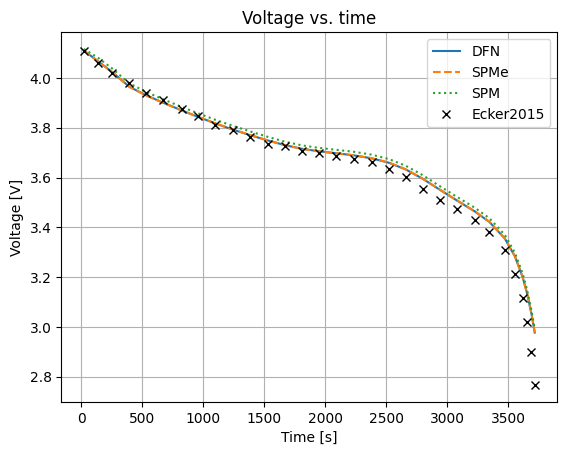

In [6]:
fig, ax = plt.subplots()
n=0
linestyle=["-","--",":"]
for sim in sims:
  time = sim.solution["Time [s]"].entries
  voltage = sim.solution["Voltage [V]"].entries
  ax.plot(time,voltage,linestyle=linestyle[n],label=f"{sim.model.name}")
  n=n+1
ax.plot(voltage_data_1C[:,0], voltage_data_1C[:,1],'xk',label=f"Ecker2015")
ax.set_title("Voltage vs. time")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Voltage [V]")
ax.grid(True)
ax.legend(loc='best')
plt.show()

# Literature
    [1] Marc Doyle et al. (1993), J. Electrochem. Soc. 140 1526
    [2] Thomas F. Fuller et al. (1994), J. Electrochem. Soc. 141
    [3] F Brosa Planella et al. (2022), Prog. Energy 4 042003
    [4] Scott G. Marquis et al. (2019), J. Electrochem. Soc. 166 A3693
    [5] Ecker et al. (2015), J. Electrochem. Soc. 162 A1836
    [6] Ecker et al. (2015), J. Electrochem. Soc. 162 A1849

# Task #1
- Setup the DFN-, SPMe- and SPM-model for the C-rates of 1C and 5C and compare with the experimental data from Ecker et al. (2015).

In [1]:
#Solution #1: comparison with experiment
import pybamm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Ecker et al 2015 parameter set
param = pybamm.ParameterValues("Ecker2015")

# Define the simulation
sims= []
models = [
    pybamm.lithium_ion.DFN(name="DFN"),
    pybamm.lithium_ion.SPMe(name="SPMe"),
    pybamm.lithium_ion.SPM(name="SPM"),
]
params=pybamm.ParameterValues("Ecker2015")
params=pybamm.get_size_distribution_parameters(params)
var_pts= {"x_n": 20, "x_s": 10, "x_p": 20, "r_n": 20, "r_p": 20}
#import experimental data
os.chdir(pybamm.__path__[0]+'/..')
voltage_data_1C = pd.read_csv("pybamm/input/discharge_data/Ecker2015/Ecker_1C.csv", header=None).to_numpy()
voltage_data_5C = pd.read_csv("pybamm/input/discharge_data/Ecker2015/Ecker_5C.csv", header=None).to_numpy()

#setup and run the models
n=0
C_rates=[1,5]
for C_rate in C_rates:
    t_eval=[]
    if C_rate==1:
        t_eval=voltage_data_1C[:,0]
    elif C_rate==5:
        t_eval=voltage_data_5C[1:-1,0]
    for model in models:
        submesh_types = model.default_submesh_types
        submesh_types["negative particle"] = pybamm.MeshGenerator(pybamm.Exponential1DSubMesh, 
                                                                  submesh_params={"side": "right"})
        submesh_types["positive particle"] = pybamm.MeshGenerator(pybamm.Exponential1DSubMesh, 
                                                                  submesh_params={"side": "right"})
        solver = pybamm.CasadiSolver(mode="fast")
        sim = pybamm.Simulation(model, parameter_values=param, C_rate=C_rate, solver=solver, 	var_pts=var_pts,   submesh_types=submesh_types,)
        sim.solve(t_eval=t_eval)
        sims.append(sim)

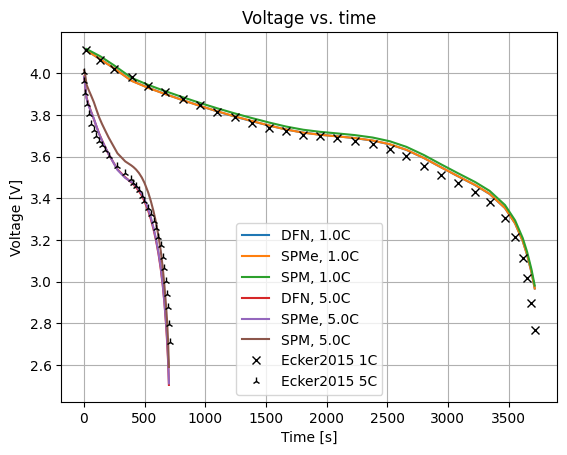

In [2]:
#Plot the solution
fig, ax = plt.subplots()
n=0
linestyle=["-","--",":"]
for sim in sims:
  time = sim.solution["Time [s]"].entries
  voltage = sim.solution["Voltage [V]"].entries
  ax.plot(time, voltage,label=f"{sim.model.name}, {sim.solution['C-rate'].entries[-1]}C")
  n=n+1
ax.plot(voltage_data_1C[:,0], voltage_data_1C[:,1],'xk',label=f"Ecker2015 1C")
ax.plot(voltage_data_5C[:,0], voltage_data_5C[:,1],'2k',label=f"Ecker2015 5C")
ax.set_title("Voltage vs. time")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Voltage [V]")
ax.grid(True)
ax.legend(loc='best')
plt.show()


# Tasks #2 & #3
- Calculate the absolute voltage error (= |simulated voltage - measured voltage| ) for the different models and 
- Calculate a mean error (average of absolute voltage error) over the solving time for the models

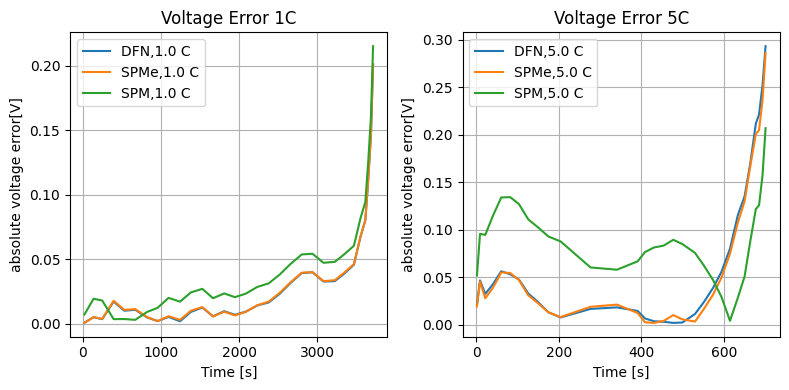

In [9]:
#Solution #2: absolute error over time
i=0
mean_error=[]
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
for i in range(6):
    sim_error=[]
    if i<3:
        sim_error=abs(sims[i].solution["Voltage [V]"].entries-voltage_data_1C[:,1])
        mean_error.append(np.mean(sim_error))
        ax1.plot(sims[i].solution["Time [s]"].entries, sim_error, label=f"{sims[i].model.name},{sims[i].solution['C-rate'].entries[-1]} C")
    else:
        sim_error=abs(sims[i].solution["Voltage [V]"].entries-voltage_data_5C[1:-1,1])
        mean_error.append(np.mean(sim_error))
        ax2.plot(sims[i].solution["Time [s]"].entries, sim_error, label=f"{sims[i].model.name},{sims[i].solution['C-rate'].entries[-1]} C")
    i=i+1
ax1.set_title("Voltage Error 1C")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("absolute voltage error[V]")
ax1.grid(True)
ax1.legend(loc='best')
ax2.set_title("Voltage Error 5C")
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("absolute voltage error[V]")
ax2.grid(True)
ax2.legend(loc='best')
plt.tight_layout()


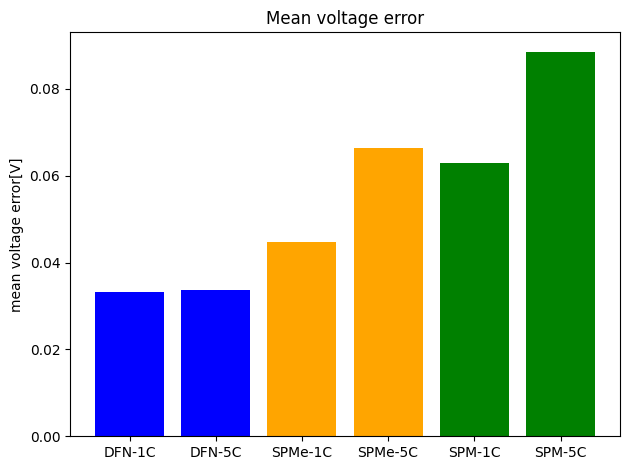

In [10]:
#Solution #3: mean absoulute error
names=["DFN-1C","DFN-5C","SPMe-1C","SPMe-5C","SPM-1C","SPM-5C"]
bar_colors = ['blue','blue', 'orange','orange', 'green','green']
fig, ax = plt.subplots()
ax.bar(names,mean_error,color=bar_colors)
ax.set_title("Mean voltage error")
ax.set_ylabel("mean voltage error[V]")
plt.tight_layout()
